In [1]:
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

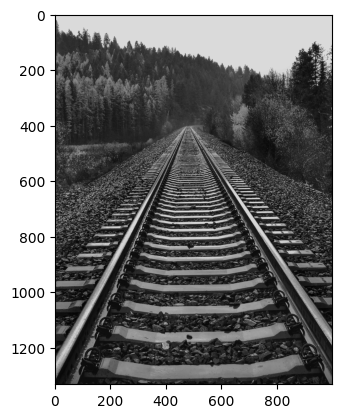

In [10]:
img = cv.imread('railway.jpeg', 0)
plt.imshow(img, cmap='gray')

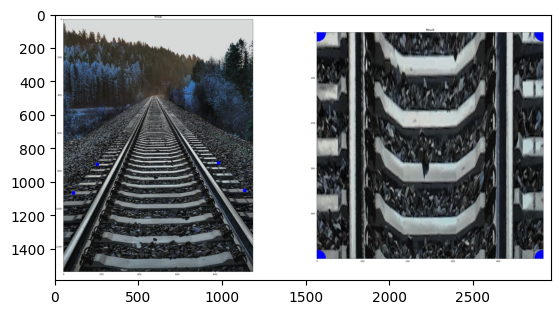

In [9]:
img_res = cv.imread('railway_result.png')
plt.imshow(img)

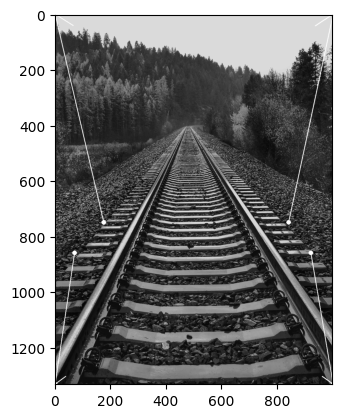

In [11]:
img_cp = np.copy(img)

height, width = img.shape[:2]
pts1 = [
    [175, 750],
    [70, 860],
    [840, 750],
    [920, 860]
]

pts2 = [
    [0, 0],
    [0, height],
    [width, 0],
    [width, height]
]

WHITE = (255, 255, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_cp, center=p1, radius=5, color=WHITE, thickness=5)
    cv.circle(img_cp, center=p2, radius=5, color=WHITE, thickness=5)
    cv.arrowedLine(img_cp, p1, p2, color=WHITE, thickness=2)

plt.imshow(img_cp, cmap='gray')

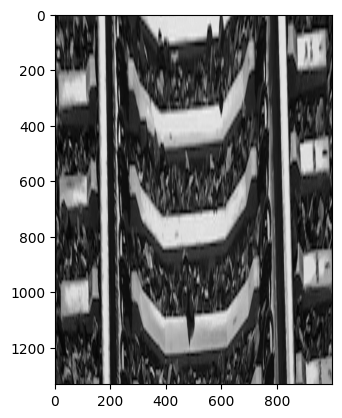

In [12]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(img, M, (width, height))
plt.imshow(img_res, cmap='gray')

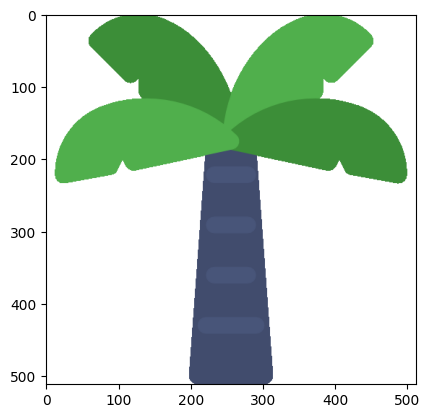

In [48]:
img = cv.imread('palm.png', cv.COLOR_BGR2RGB)
plt.imshow(img)

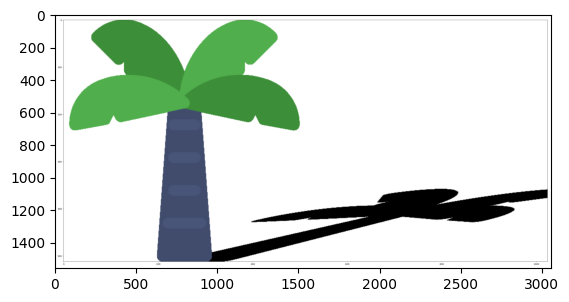

In [15]:
img_res = cv.imread('palm_result.png', cv.COLOR_BGR2RGB)
plt.imshow(img_res)

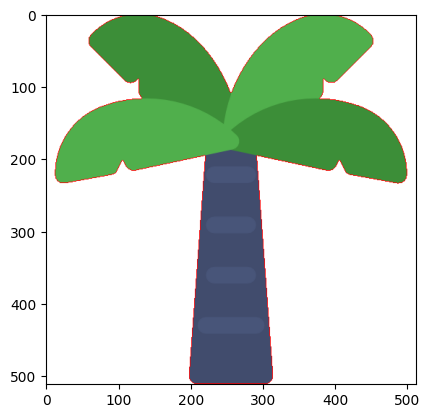

In [19]:
hsv_min = np.array((0, 1, 0), np.uint8)
hsv_max = np.array((179, 255, 255), np.uint8)
hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV )
thresh = cv.inRange( hsv, hsv_min, hsv_max )
contours,_ = cv.findContours( thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours( img, contours, -1, (255,0,0) )
plt.imshow(img)

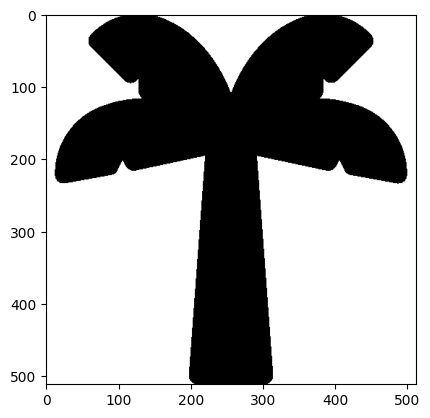

In [33]:
mask = np.zeros_like(img)
cv.drawContours(mask, [contours[0]], 0, (255, 255, 255), -1)
mask=cv.bitwise_not(mask)
plt.imshow(mask)

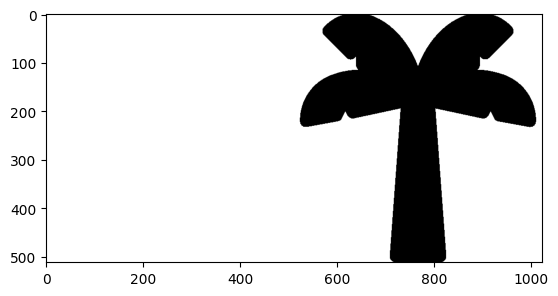

In [41]:
img_long = np.concatenate((np.zeros_like(mask) + 255, mask), axis=1)
plt.imshow(img_long)

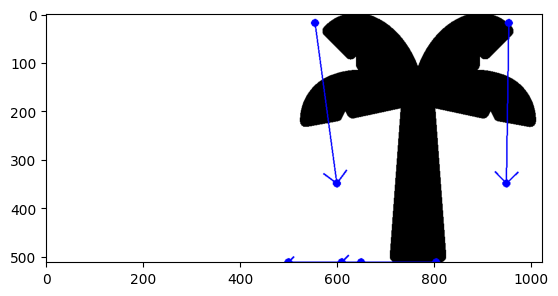

In [42]:
mask_cope = np.copy(img_long)

height, width = mask_cope.shape[:2]
pts1 = [
    [650, height],
    [555, 20],
    [805, height],
    [955, 20]
]

pts2 = [
    [500, height],
    [600, 350],
    [610, height],
    [950, 350]
]

WHITE = (0,0, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(mask_cope, center=p1, radius=5, color=WHITE, thickness=5)
    cv.circle(mask_cope, center=p2, radius=5, color=WHITE, thickness=5)
    cv.arrowedLine(mask_cope, p1, p2, color=WHITE, thickness=2)

plt.imshow(mask_cope, cmap='gray')

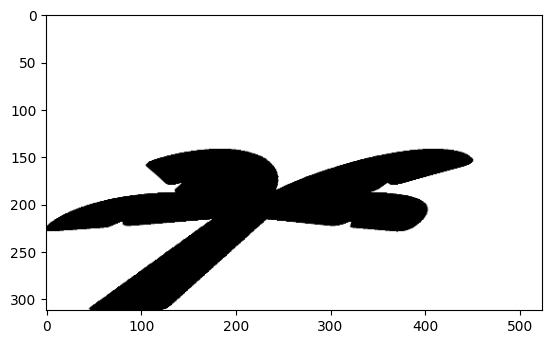

In [60]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(cv.bitwise_not(img_long), M, (width, height))
plt.imshow(img_res, cmap='gray')
img_res = cv.bitwise_not(img_res[200:,500:])
plt.imshow(img_res)

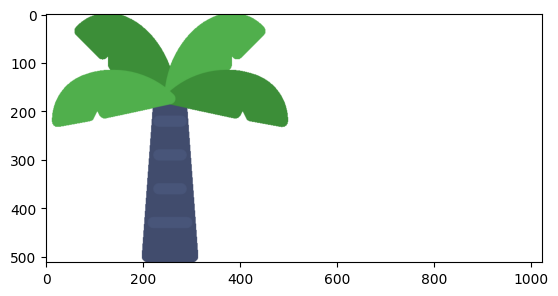

In [75]:
whole_result = np.concatenate((img, np.zeros_like(img) + 255), axis=1)
plt.imshow(whole_result)

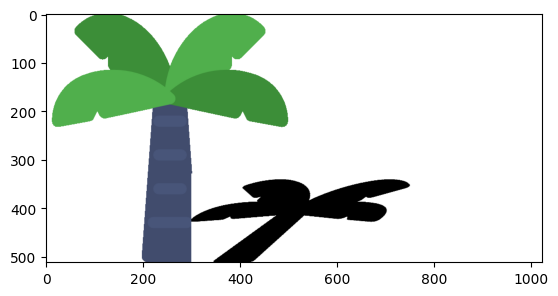

In [103]:
t=whole_result.copy()
t[330:512,300:824]=img_res[130:,:]
plt.imshow(t)